# Lecture 06의 데모

### Lecture 06의 데모에 대한 코드

참고자료: 

https://github.com/data-8/materials-sp22/blob/main/lec/lec07.ipynb

https://github.com/data-8/materials-sp22/blob/main/lec/lec08.ipynb

In [4]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/lec

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ITEC419-fa22/lec


In [5]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

# Lecture 05

In [6]:
Table().with_columns(
    'Flavor', make_array('Chocolate', 'Strawberry', 'Vanilla'),
    'Number of Cartons', make_array(16, 5, 9)
)

Flavor,Number of Cartons
Chocolate,16
Strawberry,5
Vanilla,9


## **Bar Charts**

In [7]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [8]:
top10_adjusted=top_movies.take(np.arange(10))
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [9]:
millions=np.round(top10_adjusted.column('Gross (Adjusted)')/1e6,3)
top10_adjusted= top10_adjusted.with_column('Millions',millions)
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year,Millions
Gone with the Wind,MGM,198676459,1796176700,1939,1796.18
Star Wars,Fox,460998007,1583483200,1977,1583.48
The Sound of Music,Fox,158671368,1266072700,1965,1266.07
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1261.09
Titanic,Paramount,658672302,1204368000,1997,1204.37
The Ten Commandments,Paramount,65500000,1164590000,1956,1164.59
Jaws,Universal,260000000,1138620700,1975,1138.62
Doctor Zhivago,MGM,111721910,1103564200,1965,1103.56
The Exorcist,Warner Brothers,232906145,983226600,1973,983.227
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,969.01


np

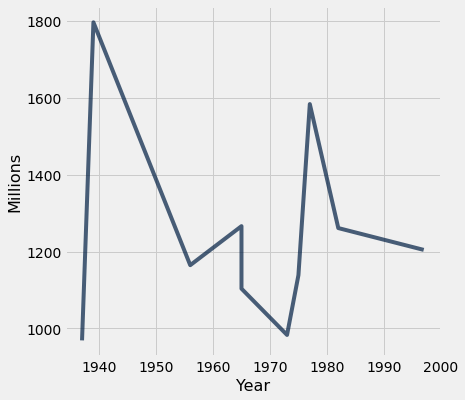

In [10]:
top10_adjusted.plot('Year','Millions')

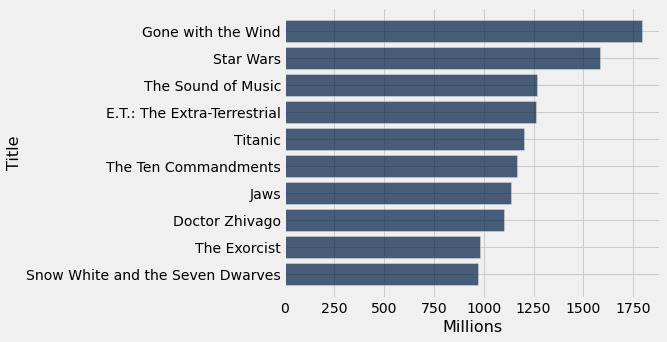

In [11]:
top10_adjusted.barh('Title','Millions')

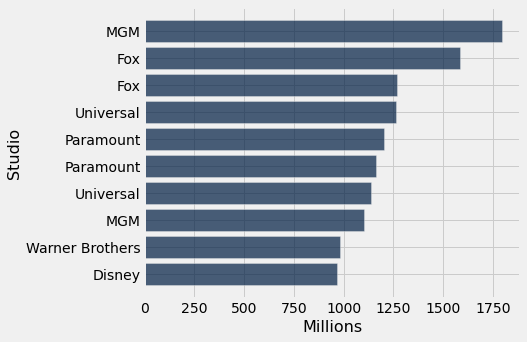

In [12]:
top10_adjusted.barh('Studio','Millions')

어떤회사가 젤 많이 벌었는지 fox 끼리 안합쳐짐-> group을 해야 함

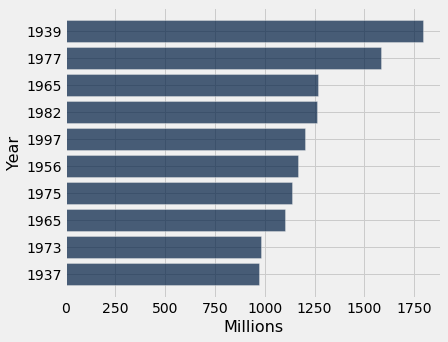

In [13]:
top10_adjusted.barh('Year','Millions')

**How Do You Generate This Chart?**

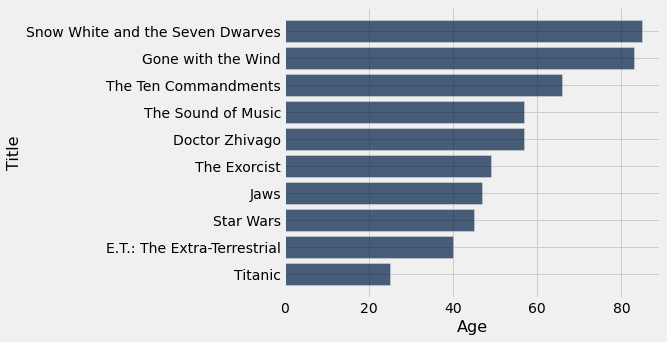

In [14]:
year=top10_adjusted.column('Year')

top10_adjusted=top10_adjusted.with_column('Age',2022-year)
top10_adjusted.sort('Age',descending=True).barh('Title','Age')

2022-year: broadcasting

## **Categorical Distribution**

In [15]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [16]:
studios=top_movies.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


select:배열을 만들어냄

In [17]:
studio_distribution=studios.group('Studio')
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


group: 의 결과-> 테이블(count 열이 하나 생겨서 나옴)

## **Bar Charts**

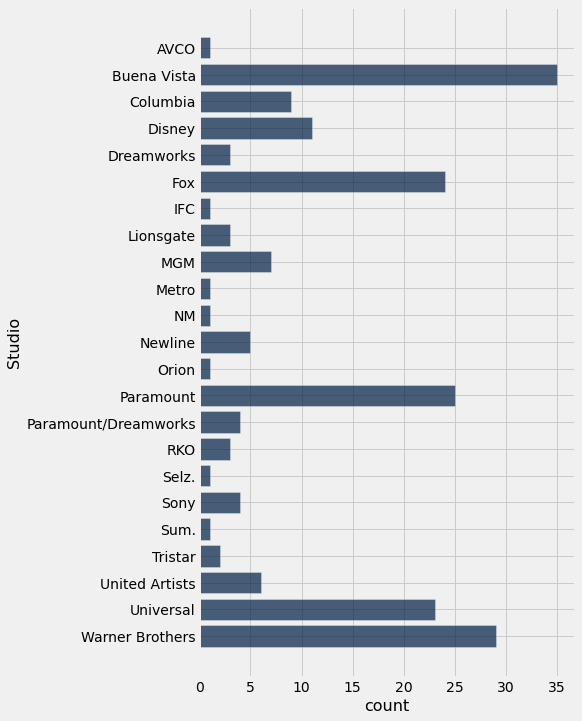

In [18]:
studio_distribution.barh('Studio')

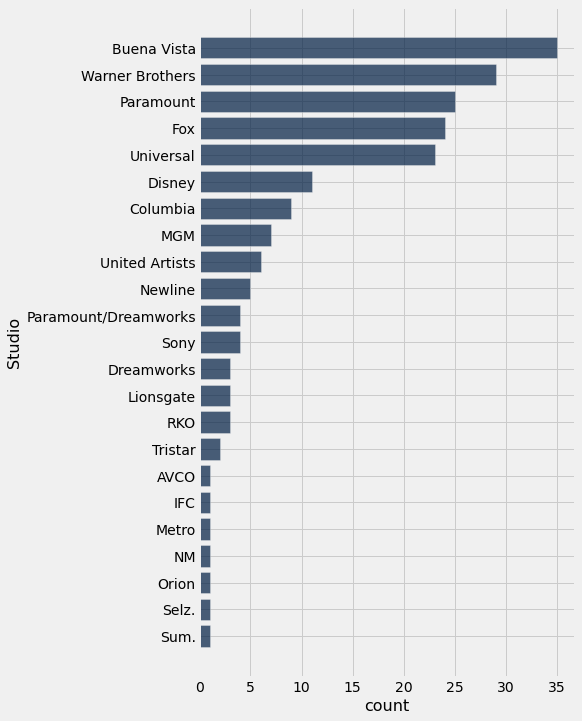

In [19]:
studio_distribution.sort('count',descending=True).barh('Studio')

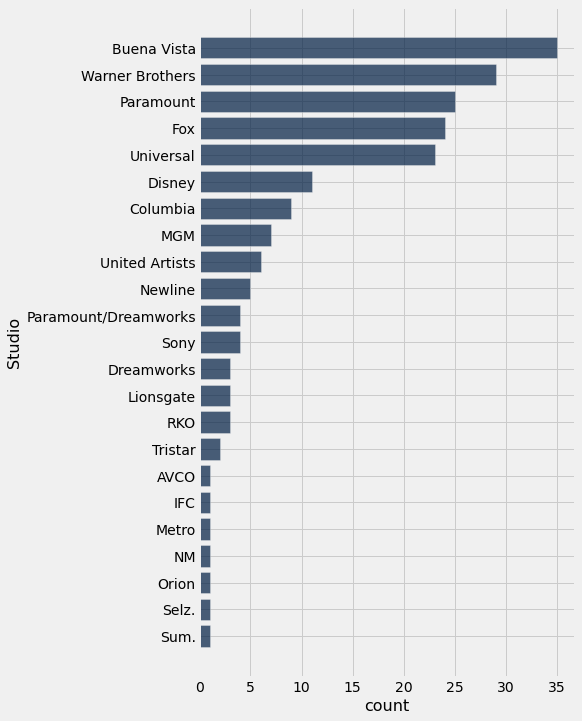

In [20]:
(top_movies
        .group('Studio')
        .sort('count',descending=True)
        .barh('Studio'))

괄호로 한번 더 묶어주고 밑으로 내리면 훨씬 더 보기 쉬움

## **Numerical Distribution**

In [21]:
ages=2022-top_movies.column('Year') # 배열
top_moives = top_movies.with_column('Age',ages).drop('Year')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [25]:
min(ages),max(ages)

(5, 101)

In [26]:
my_bins=make_array(0,5,10,15,25,40,65,105)
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 105])

In [27]:
binned_data=top_moives.bin('Age', bins=my_bins) #column을 주고 변수를 여러개 주는데 그 중의 하나가 bins
binned_data

bin,Age count
0,0
5,25
10,16
15,40
25,42
40,56
65,21
105,0


In [28]:
top_moives.bin('Age', bins=np.arange(0,126,25))

bin,Age count
0,81
25,70
50,39
75,9
100,1
125,0


## **Histogram**

In [29]:
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 105])

In [30]:
binned_data

bin,Age count
0,0
5,25
10,16
15,40
25,42
40,56
65,21
105,0


In [31]:
binned_data.column('Age count')/binned_data.column('Age count').sum()*100# 레이블의 배열이 나옴

array([  0. ,  12.5,   8. ,  20. ,  21. ,  28. ,  10.5,   0. ])

In [35]:
top_movies.hist('Age', bins=my_bins,unit='Year')

ValueError: ignored

In [36]:
top_movies.hist('Age',bins=np.arange(0,126,25),unit='Year')

ValueError: ignored

In [37]:
top_movies.hist('Age',bins=np.arange(0,110,10),unit='Year')

ValueError: ignored

In [39]:
top_movies.hist('Age',bins=np.arange(0,106,5),unit='Year')

ValueError: ignored

In [38]:
top_movies.hist('Age',bins=np.arange(0,103,2),unit='Year')

ValueError: ignored

In [40]:
top_movies.hist('Age',bins=np.arange(0,102,1),unit='Year')

ValueError: ignored

## **Height**

**Question: What is the height of the [40, 65) bin?**

In [45]:
# Step 1: Calc-ulate % of movies in the [40, 65) bin
percents=binned_data.column('Age count')/binned_data.column('Age count').sum()*100
binned_data=binned_data.with_column('Percent',percents)
#binned_data
percent=binned_data.where('bin',40).column('Percent').item(0)
percent

28.000000000000004

In [48]:
# Step 2: Calculate the width of the 40-65 bin
width=65-40
width

25

In [49]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height=percent/width
height

1.12